<a href="https://colab.research.google.com/github/venkiharvgit/csci-e-599a-2024-cybersecurity/blob/main/playground/EDA_Venki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
shared_drive_data_path = '/content/gdrive/MyDrive/capstone-project/data'

In [ ]:
os.chdir(shared_drive_data_path)
os.listdir()

['NF-BoT-IoT',
 'NF-CSE-CIC-IDS2018',
 'NF-UQ-NIDS',
 'NF-UNSW-NB15-v2',
 'NF-ToN-IoT-v2',
 'NF-BoT-IoT-v2',
 'NF-CSE-CIC-IDS2018-v2',
 'NF-UQ-NIDS-v2',
 'CIC-ToN-IoT',
 'CIC-BoT-IoT',
 '.ipynb_checkpoints',
 'parquet',
 'NF-UNSW-NB15',
 'NF-ToN-IoT']

In [ ]:
pwd=os.getcwd()

In [ ]:
pwd

'/content/gdrive/.shortcut-targets-by-id/1Gh9T4kzFm8D9nVbOzWLXHvaD8DMl7OiT/capstone-project/data'

In [ ]:
# to test github eda

In [ ]:
shared_drive_data_path = '/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-UQ-NIDS_chunks'

In [ ]:
df_nf_uq_nids_v1 = pd.read_parquet(shared_drive_data_path)

In [ ]:
df_nf_uq_nids_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10265386 entries, 0 to 94189
Data columns (total 13 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 1.1+ GB


In [ ]:
df_nf_uq_nids_v1.shape

(10265386, 13)

In [ ]:
df_nf_uq_nids_v1['Label'].unique()

array([0, 1])

In [ ]:
# Duplicate Checks

In [ ]:
df_nf_uq_nids_v1[df_nf_uq_nids_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,


In [ ]:
df_nf_uq_nids_v1 = df_nf_uq_nids_v1.drop_duplicates()

In [ ]:
df_nf_uq_nids_v1.shape

(10265386, 13)

In [ ]:
df_nf_uq_nids_v1.isna().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
dtype: int64

**No Null Values in the above data set df_nf_uq_nids_v1**




In [ ]:
df_nf_uq_nids_v1.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

<ipython-input-31-d10a3be7cdb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1=df_nf_uq_nids_v1.corr()


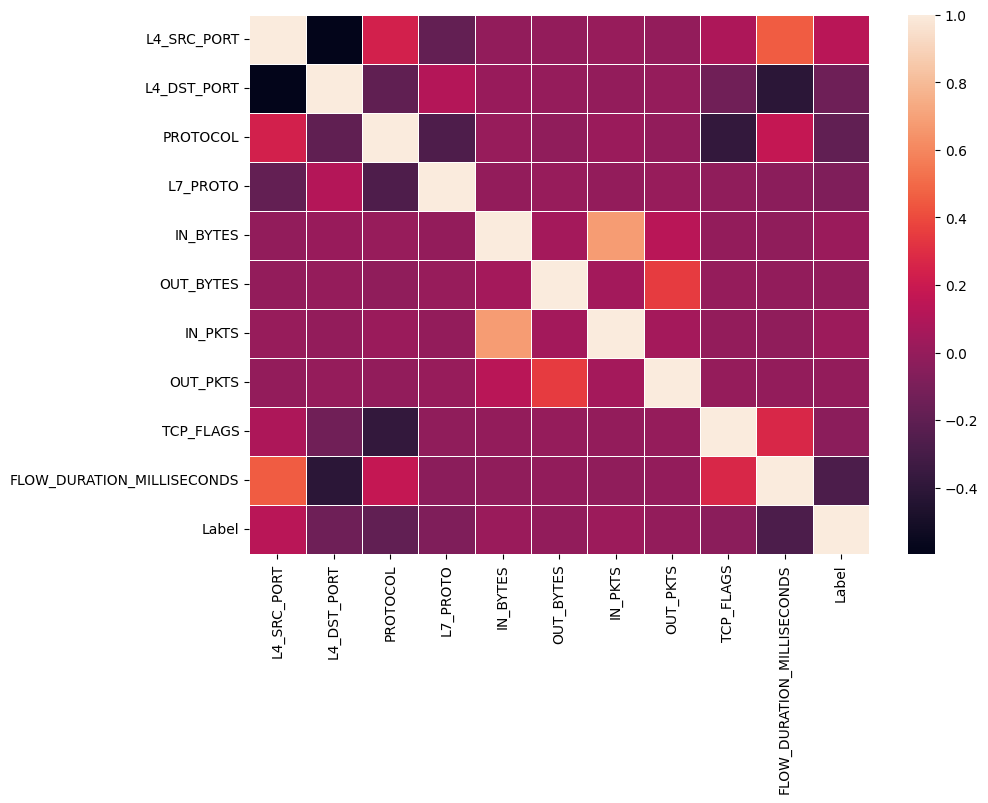

In [ ]:
plt.figure(figsize = (10,7))
corr1=df_nf_uq_nids_v1.corr()
ax = sns.heatmap(corr1, annot=False, linewidths=.6)

**FLOW_DURATION_MILLISECONDS are having negative correlation with Label**

In [ ]:
# Excluding label, attack,dataset and IPV4_SRC_ADDR,IPV4_DST_ADDR
X=df_nf_uq_nids_v1[['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
X.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
__null_dask_index__,,,,,,,,,,
0,62073,56082,6,0.0,9672,416,11,8,25,15
1,32284,1526,6,0.0,1776,104,6,2,25,0
2,21,21971,6,1.0,1842,1236,26,22,25,1111
3,23800,46893,6,0.0,528,8824,10,12,27,124
4,63062,21,6,1.0,1786,2340,32,34,25,1459


In [ ]:
y=df_nf_uq_nids_v1['Label']

In [ ]:
#PCA for Visualizing the data in Two dimensional space to see any anomalies/outliers and any Patterns

In [ ]:
scaler=StandardScaler()
X = scaler.fit_transform(X)

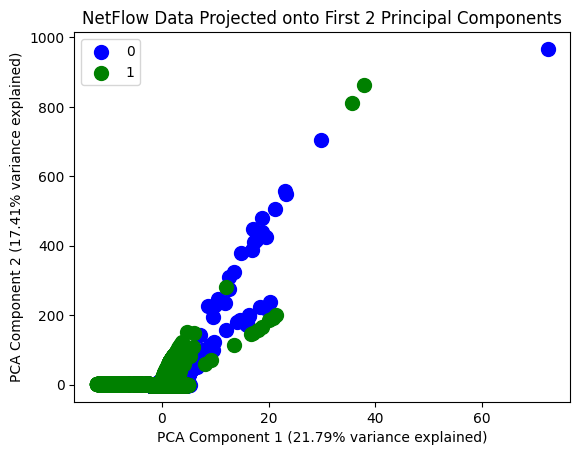

In [ ]:
pca = PCA(n_components=2).fit(X)
attack_PCA = pca.transform(X)

scatter_x = np.array(attack_PCA[:,0])
scatter_y = np.array(attack_PCA[:,1])
cdict = {0: 'blue', 1: 'green'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('NetFlow Data Projected onto First 2 Principal Components');
plt.show()

**Observed two elongated clusters between benign and non benign**

**NF-BoT-IoT-v1**

In [ ]:
# Erroring out due to time out as it has huge data.
#df_nf_uq_nids_v2=pd.read_csv(os.getcwd()+'/NF-UQ-NIDS-v2/data/NF-UQ-NIDS-v2.csv')

In [ ]:
pwd

'/content/gdrive/.shortcut-targets-by-id/1Gh9T4kzFm8D9nVbOzWLXHvaD8DMl7OiT/capstone-project/data'

In [ ]:
df_nf_BoT_iot_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-BoT-IoT_chunks')

In [ ]:
df_nf_BoT_iot_v1.shape

(510941, 13)

In [ ]:
df_nf_BoT_iot_v1[df_nf_BoT_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,


**No Duplicates**

In [ ]:
df_nf_BoT_iot_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510941 entries, 0 to 600099
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   IPV4_SRC_ADDR               510941 non-null  object 
 1   L4_SRC_PORT                 510941 non-null  int64  
 2   IPV4_DST_ADDR               510941 non-null  object 
 3   L4_DST_PORT                 510941 non-null  int64  
 4   PROTOCOL                    510941 non-null  int64  
 5   L7_PROTO                    510941 non-null  float64
 6   IN_BYTES                    510941 non-null  int64  
 7   OUT_BYTES                   510941 non-null  int64  
 8   IN_PKTS                     510941 non-null  int64  
 9   OUT_PKTS                    510941 non-null  int64  
 10  TCP_FLAGS                   510941 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  510941 non-null  int64  
 12  Label                       510941 non-null  int64  
dtypes: float64(1),

In [ ]:
df_nf_BoT_iot_v1.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,
0,192.168.100.6,52670,192.168.100.1,53,17,5.212,71,126,1,1,0,4294966,0
1,192.168.100.6,49160,192.168.100.149,4444,6,0.000,217753000,199100,4521,4049,24,4176249,1
2,192.168.100.46,3456,192.168.100.5,80,17,0.000,8508021,8918372,9086,9086,0,4175916,0
3,192.168.100.3,80,192.168.100.55,8080,6,7.000,8442138,9013406,9086,9086,0,4175916,0
4,192.168.100.46,80,192.168.100.5,80,6,7.000,8374706,0,9086,0,0,4175916,0


In [ ]:
df_nf_BoT_iot_v1['Label'].unique()

array([0, 1])

In [ ]:
# Excluding label, attack,dataset and IPV4_SRC_ADDR,IPV4_DST_ADDR
X=df_nf_BoT_iot_v1[['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
y=df_nf_BoT_iot_v1['Label']

In [ ]:
y=np.array(y)

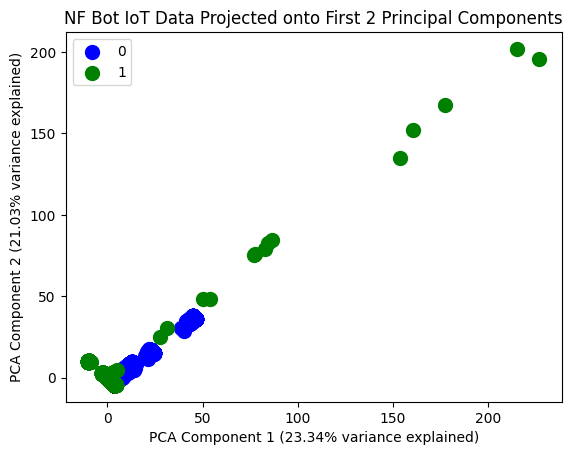

In [ ]:
scaler=StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2).fit(X)
attack_PCA = pca.transform(X)

scatter_x = np.array(attack_PCA[:,0])
scatter_y = np.array(attack_PCA[:,1])
cdict = {0: 'blue', 1: 'green'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('NF Bot IoT Data Projected onto First 2 Principal Components');
plt.show()

Observed two elongated clusters between benign and non benign

In [ ]:
pip install umap-learn

In [ ]:
#from umap import UMAP
#umap_model = UMAP(n_components=2).fit(X)
#umap_result = umap_model.transform(X)

In [ ]:
## Create a scatter plot
#plt.figure(figsize=(8, 6))
#plt.scatter(umap_result[:, 0], umap_result[:, 1], c='blue', alpha=0.5, edgecolors='w')

# Set axis labels and title
#plt.xlabel('UMAP Component 1')
#plt.ylabel('UMAP Component 2')
#plt.title('UMAP Visualization of Clusters')

# Show the plot
#plt.show()

**NF-BoT-IoT-v2**

In [ ]:
# Erroring Out huge data
#df_nf_BoT_iot_v2=pd.read_csv(pwd+'/NF-BoT-IoT-v2/data/NF-BoT-IoT-v2.csv')

**NF-ToN-IoT-v1**

In [ ]:
df_nf_ToN_iot_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-ToN-IoT_chunks')

In [ ]:
df_nf_ToN_iot_v1.shape

(846951, 13)

In [ ]:
df_nf_ToN_iot_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846951 entries, 0 to 1379273
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   IPV4_SRC_ADDR               846951 non-null  object 
 1   L4_SRC_PORT                 846951 non-null  int64  
 2   IPV4_DST_ADDR               846951 non-null  object 
 3   L4_DST_PORT                 846951 non-null  int64  
 4   PROTOCOL                    846951 non-null  int64  
 5   L7_PROTO                    846951 non-null  float64
 6   IN_BYTES                    846951 non-null  int64  
 7   OUT_BYTES                   846951 non-null  int64  
 8   IN_PKTS                     846951 non-null  int64  
 9   OUT_PKTS                    846951 non-null  int64  
 10  TCP_FLAGS                   846951 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  846951 non-null  int64  
 12  Label                       846951 non-null  int64  
dtypes: float64(1)

In [ ]:
df_nf_ToN_iot_v1.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,
0,192.168.1.195,63318,52.139.250.253,443,6,91.00,181,165,2,1,24,327,0
1,192.168.1.79,57442,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0
2,192.168.1.79,57452,239.255.255.250,15600,17,0.00,63,0,1,0,0,0,0
3,192.168.1.193,138,192.168.1.255,138,17,10.16,472,0,2,0,0,0,0
4,192.168.1.79,51989,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0


In [ ]:
# Excluding label, attack,dataset and IPV4_SRC_ADDR,IPV4_DST_ADDR
X=df_nf_ToN_iot_v1[['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
y=df_nf_ToN_iot_v1['Label']

In [ ]:
scaler=StandardScaler()
X = scaler.fit_transform(X)

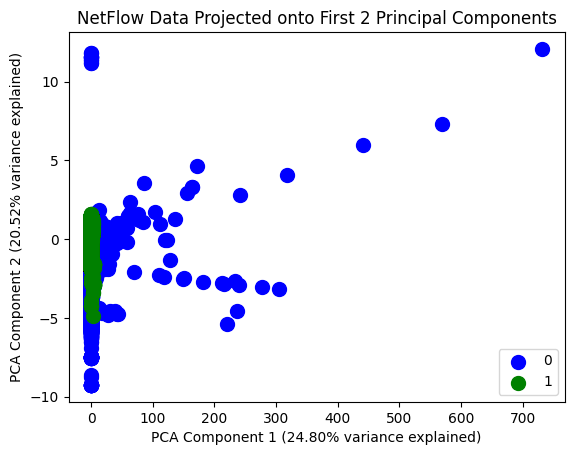

In [ ]:
pca = PCA(n_components=2).fit(X)
attack_PCA = pca.transform(X)

scatter_x = np.array(attack_PCA[:,0])
scatter_y = np.array(attack_PCA[:,1])
cdict = {0: 'blue', 1: 'green'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('NetFlow Data Projected onto First 2 Principal Components');
plt.show()

**NF-UNSW-NB15**

In [ ]:
#df_nf_UNSW_NB15=pd.read_csv(pwd+'/NF-UNSW-NB15/data/NF-UNSW-NB15.csv')



In [ ]:
df_nf_UNSW_NB15=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-UNSW-NB15_chunks')

In [ ]:
df_nf_UNSW_NB15.shape

(1593097, 13)

In [ ]:
df_nf_UNSW_NB15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593097 entries, 0 to 1623117
Data columns (total 13 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   IPV4_SRC_ADDR               1593097 non-null  object 
 1   L4_SRC_PORT                 1593097 non-null  int64  
 2   IPV4_DST_ADDR               1593097 non-null  object 
 3   L4_DST_PORT                 1593097 non-null  int64  
 4   PROTOCOL                    1593097 non-null  int64  
 5   L7_PROTO                    1593097 non-null  float64
 6   IN_BYTES                    1593097 non-null  int64  
 7   OUT_BYTES                   1593097 non-null  int64  
 8   IN_PKTS                     1593097 non-null  int64  
 9   OUT_PKTS                    1593097 non-null  int64  
 10  TCP_FLAGS                   1593097 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  1593097 non-null  int64  
 12  Label                       1593097 non-null  int64  
dt

In [ ]:
# Excluding label, attack,dataset and IPV4_SRC_ADDR,IPV4_DST_ADDR
X=df_nf_UNSW_NB15[['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

<ipython-input-89-d0403f77c876>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1=df_nf_UNSW_NB15.corr()


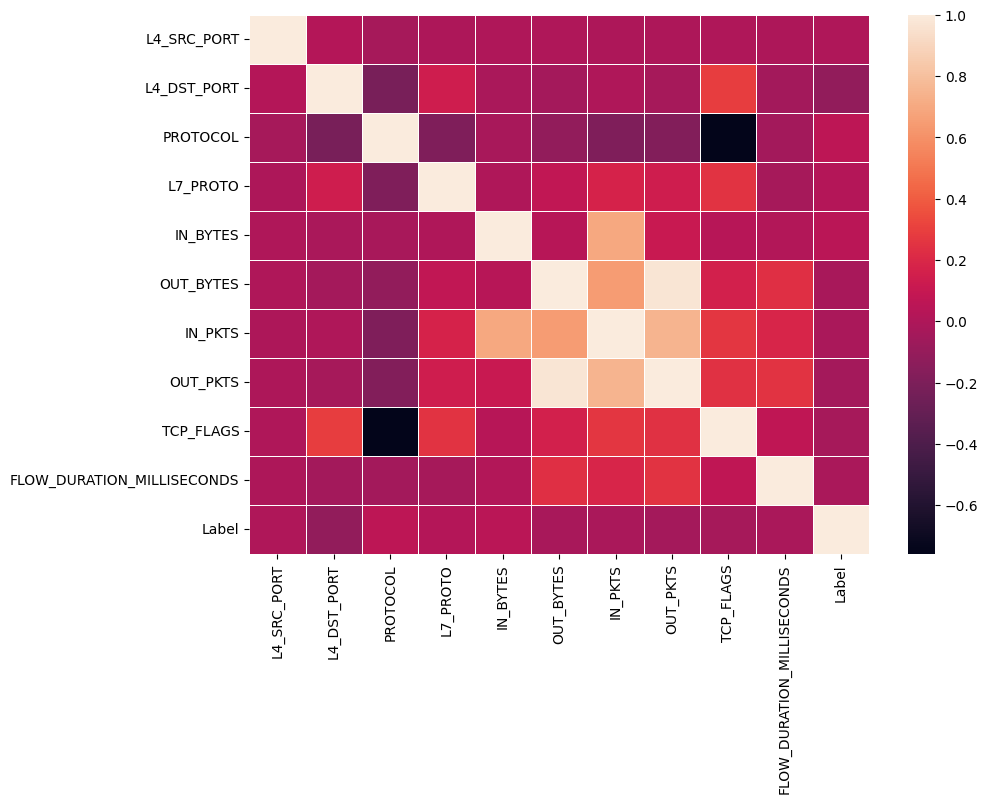

In [ ]:
plt.figure(figsize = (10,7))
corr1=df_nf_UNSW_NB15.corr()
ax = sns.heatmap(corr1, annot=False, linewidths=.6)

In [ ]:
y=df_nf_UNSW_NB15['Label']

In [ ]:
scaler=StandardScaler()
X = scaler.fit_transform(X)

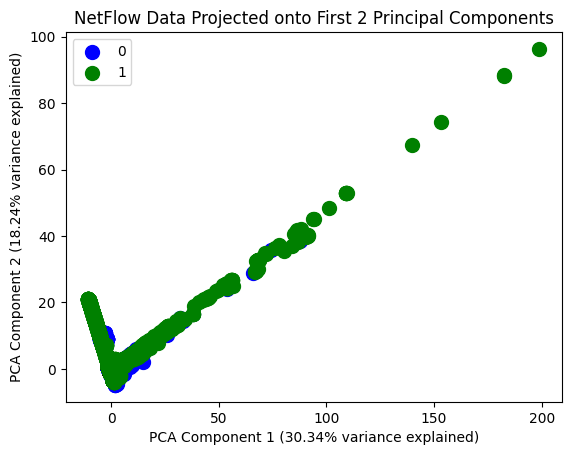

In [ ]:
pca = PCA(n_components=2).fit(X)
attack_PCA = pca.transform(X)

scatter_x = np.array(attack_PCA[:,0])
scatter_y = np.array(attack_PCA[:,1])
cdict = {0: 'blue', 1: 'green'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('NetFlow Data Projected onto First 2 Principal Components');
plt.show()

#Analysis of Basic Network Data for **df_nf_ToN_iot_v1**

In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
G = nx.from_pandas_edgelist(df_nf_ToN_iot_v1, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph())
# Basic information
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Directed Graph:", nx.is_directed(G))

Number of nodes: 1501
Number of edges: 2021
Directed Graph: True


In [ ]:
# Access node and edge attributes
node_attributes = G.nodes(data=True)
edge_attributes = G.edges(data=True)

# Display node and edge attributes
print("Node Attributes:", node_attributes)
print("Edge Attributes:", edge_attributes)

Node Attributes: [('192.168.1.195', {}), ('52.139.250.253', {}), ('192.168.1.79', {}), ('192.168.1.255', {}), ('239.255.255.250', {}), ('192.168.1.193', {}), ('192.168.1.6', {}), ('52.43.40.243', {}), ('192.168.1.1', {}), ('224.0.0.1', {}), ('192.168.1.31', {}), ('192.168.1.169', {}), ('224.0.0.251', {}), ('224.0.0.252', {}), ('192.168.1.190', {}), ('203.119.86.101', {}), ('192.168.1.180', {}), ('192.168.1.30', {}), ('101.119.11.11', {}), ('192.168.1.152', {}), ('101.119.11.17', {}), ('192.168.1.17', {}), ('224.0.0.2', {}), ('144.48.166.166', {}), ('185.136.99.111', {}), ('27.50.65.23', {}), ('185.136.97.111', {}), ('216.239.34.10', {}), ('224.0.0.22', {}), ('216.239.32.10', {}), ('192.58.128.30', {}), ('192.33.14.30', {}), ('216.58.200.99', {}), ('172.217.167.77', {}), ('220.158.215.20', {}), ('199.7.91.13', {}), ('216.239.38.10', {}), ('172.217.25.163', {}), ('65.22.199.1', {}), ('216.239.36.10', {}), ('199.7.83.42', {}), ('211.29.133.32', {}), ('162.159.25.38', {}), ('172.217.167.67

**Dont find any attributes for node and edges**

In [ ]:
# Community detection
communities = nx.algorithms.community.greedy_modularity_communities(G)

# Display communities
print("Number of Communities:", len(communities))

Number of Communities: 5


In [ ]:
print("Communities:", communities)

In [ ]:
# Centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Display centrality measures
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

Degree Centrality: {'192.168.1.195': 0.11733333333333333, '52.139.250.253': 0.0026666666666666666, '192.168.1.79': 0.005333333333333333, '192.168.1.255': 0.007333333333333333, '239.255.255.250': 0.006666666666666666, '192.168.1.193': 0.09733333333333333, '192.168.1.6': 0.01, '52.43.40.243': 0.0006666666666666666, '192.168.1.1': 0.02, '224.0.0.1': 0.0006666666666666666, '192.168.1.31': 0.07533333333333334, '192.168.1.169': 0.028666666666666667, '224.0.0.251': 0.008, '224.0.0.252': 0.0026666666666666666, '192.168.1.190': 0.7786666666666666, '203.119.86.101': 0.0006666666666666666, '192.168.1.180': 0.06999999999999999, '192.168.1.30': 0.018, '101.119.11.11': 0.007333333333333333, '192.168.1.152': 0.019333333333333334, '101.119.11.17': 0.004, '192.168.1.17': 0.0026666666666666666, '224.0.0.2': 0.0006666666666666666, '144.48.166.166': 0.0006666666666666666, '185.136.99.111': 0.0006666666666666666, '27.50.65.23': 0.0006666666666666666, '185.136.97.111': 0.0006666666666666666, '216.239.34.10'

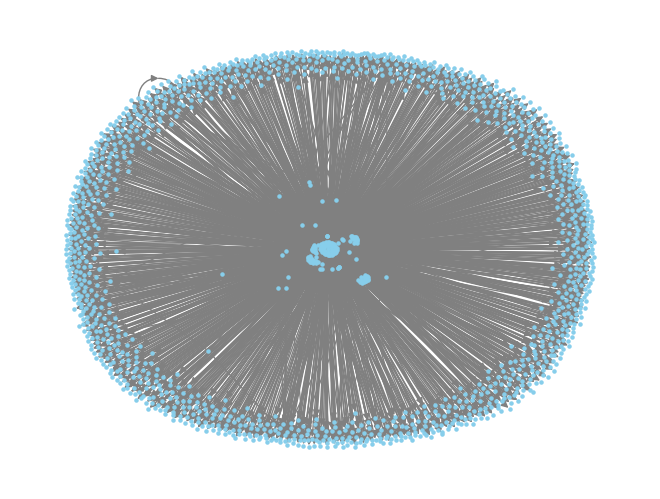

In [ ]:
import matplotlib.pyplot as plt

# Choose a layout algorithm (e.g., spring_layout)
pos = nx.spring_layout(G)

# Draw the network
nx.draw(G, pos, with_labels=False, node_size=5, node_color='skyblue', edge_color='gray', font_size=8)

# Show the plot
plt.show()


**EDA Summary**


1.  Found cluster patterns in the in the PCA plot in NF-UQ-NIDS_Chunks data and i see the same pattern in other data set as well. Also  few anomalies were found the  in the PCA plot.
2.   Correlation heat maps shows  correlation trend between label and the Flow_duration in milliseconds.

Network data analysis for df_nf_ToN_iot_v1
3. Found no of  nodes and edges.
4. Found edges are more than the nodes and it is a directed Graph
5. Not found any attribute information in the nodes and edges.
6. Found around 5 communities network data in this df_nf_ToN_iot_v1

